--- Average Packets per Second 상위 100개 IP ---
            Source IP  avg_packets_per_second
3426     23.203.87.43               14.600000
982     137.200.39.19               13.000000
1082   146.20.128.217               12.000000
2926   212.77.100.244               12.000000
1211   146.20.133.196               11.000000
3517    23.208.162.98               10.869565
3779    23.52.152.146               10.666667
2269     192.168.10.9                9.879459
5960    52.84.145.115                9.600000
3864       31.13.66.1                9.500000
1560   162.208.20.178                9.061538
8227     96.6.174.107                9.000000
3460   23.206.167.209                9.000000
2194    185.59.223.16                9.000000
112      104.16.25.92                8.974684
7634   69.172.201.247                8.900000
2268     192.168.10.8                8.839343
2257    192.168.10.12                8.610469
120      104.16.27.92                8.472727
107      104.16.24.92             

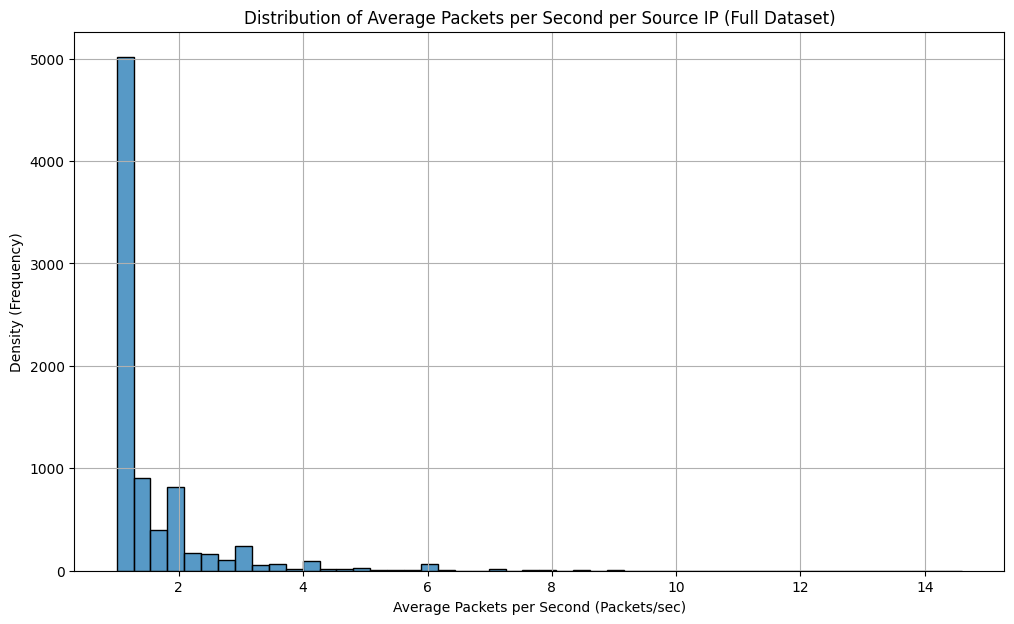

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../dataset/Monday-WorkingHours.pcap_ISCX.csv'

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

packets_per_second = df.groupby(['Source IP', 'Timestamp']).size().reset_index(name='packet_count')
avg_packets_per_ip = packets_per_second.groupby('Source IP')['packet_count'].mean().reset_index()
avg_packets_per_ip.rename(columns={'packet_count': 'avg_packets_per_second'}, inplace=True)

plt.figure(figsize=(12, 7))
sns.histplot(data=avg_packets_per_ip, x='avg_packets_per_second', bins=50)

plt.title('Distribution of Average Packets per Second per Source IP (Full Dataset)')
plt.xlabel('Average Packets per Second (Packets/sec)')
plt.ylabel('Density (Frequency)')
plt.grid(True)

output_filename = 'packet_distribution_total.png'
plt.savefig(output_filename)

sorted_ips = avg_packets_per_ip.sort_values(by='avg_packets_per_second', ascending=False)
top_100_ips = sorted_ips.head(100)
print("--- Average Packets per Second 상위 100개 IP ---")
print(top_100_ips.to_string())

--- Average Packets per Second 상위 100개 IP ---
            Source IP  avg_packets_per_second
3412     23.203.87.43               14.600000
982     137.200.39.19               13.000000
1082   146.20.128.217               12.000000
2912   212.77.100.244               12.000000
1211   146.20.133.196               11.000000
3503    23.208.162.98               10.869565
3765    23.52.152.146               10.666667
5946    52.84.145.115                9.600000
3850       31.13.66.1                9.500000
1560   162.208.20.178                9.061538
3446   23.206.167.209                9.000000
8213     96.6.174.107                9.000000
2194    185.59.223.16                9.000000
112      104.16.25.92                8.974684
7620   69.172.201.247                8.900000
120      104.16.27.92                8.472727
107      104.16.24.92                8.466667
1563    162.208.22.34                8.369565
122      104.16.28.92                8.043478
7992       81.19.72.2             

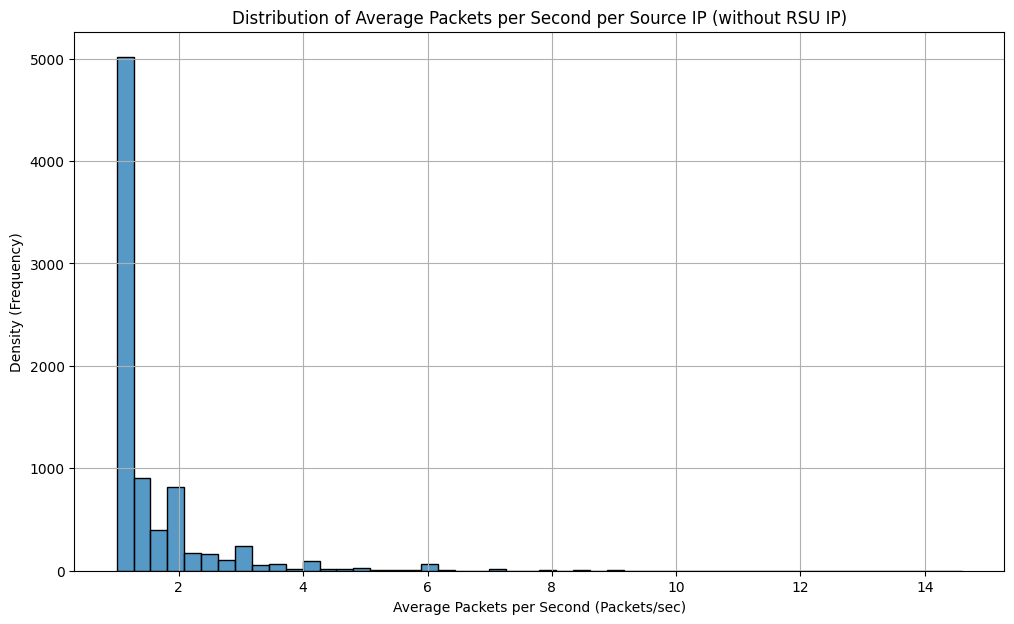

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../dataset/Monday-WorkingHours.pcap_ISCX.csv'

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

df = df[~df['Source IP'].str.startswith('192.168')]
packets_per_second = df.groupby(['Source IP', 'Timestamp']).size().reset_index(name='packet_count')
avg_packets_per_ip = packets_per_second.groupby('Source IP')['packet_count'].mean().reset_index()
avg_packets_per_ip.rename(columns={'packet_count': 'avg_packets_per_second'}, inplace=True)

plt.figure(figsize=(12, 7))
sns.histplot(data=avg_packets_per_ip, x='avg_packets_per_second', bins=50)

plt.title('Distribution of Average Packets per Second per Source IP (without RSU IP)')
plt.xlabel('Average Packets per Second (Packets/sec)')
plt.ylabel('Density (Frequency)')
plt.grid(True)

output_filename = 'packet_distribution_without_RSU.png'
plt.savefig(output_filename)

sorted_ips = avg_packets_per_ip.sort_values(by='avg_packets_per_second', ascending=False)
top_100_ips = sorted_ips.head(100)
print("--- Average Packets per Second 상위 100개 IP ---")
print(top_100_ips.to_string())

In [14]:
import pandas as pd

file_path = '../dataset/Monday-WorkingHours.pcap_ISCX.csv'

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

print(len(set(df['Source IP'])))
df = df[~df['Source IP'].str.startswith('192.168')]
print(len(set(df['Source IP'])))

# RSU IP address가 총 14개 존재


8239
8225


패킷 전송에 대한 설정
- 각 차량은 0~6초에 한 번 위의 확률 분포에 따른 패킷 생성을 실시한다.

예시

6시 6분 0초 ~ 6시 6분 5초: A차량 3초에 1개 패킷, B차량 1초에 1개 패킷, C차량 5초에 1개 패킷, D차량 1초에 3개 패킷, E차량 0초에 1개 패킷
6시 6분 6초 ~ 6시 6분 11초: A차량 7초에 2개 패킷, B차량 1초에 11개 패킷, C차량 7초에 1개 패킷, D차량 8초에 1개 패킷, E차량 10초에 2개 패킷

뭐 이런 방식으로 생성할 수 있도록 파이썬 코드짜서 50000개 수집하면 될 듯

--- Average Packets per Second 상위 100개 IP ---
       Source IP  avg_packets_per_second
0     172.16.0.1             6096.380952
1  192.168.10.50                3.000000


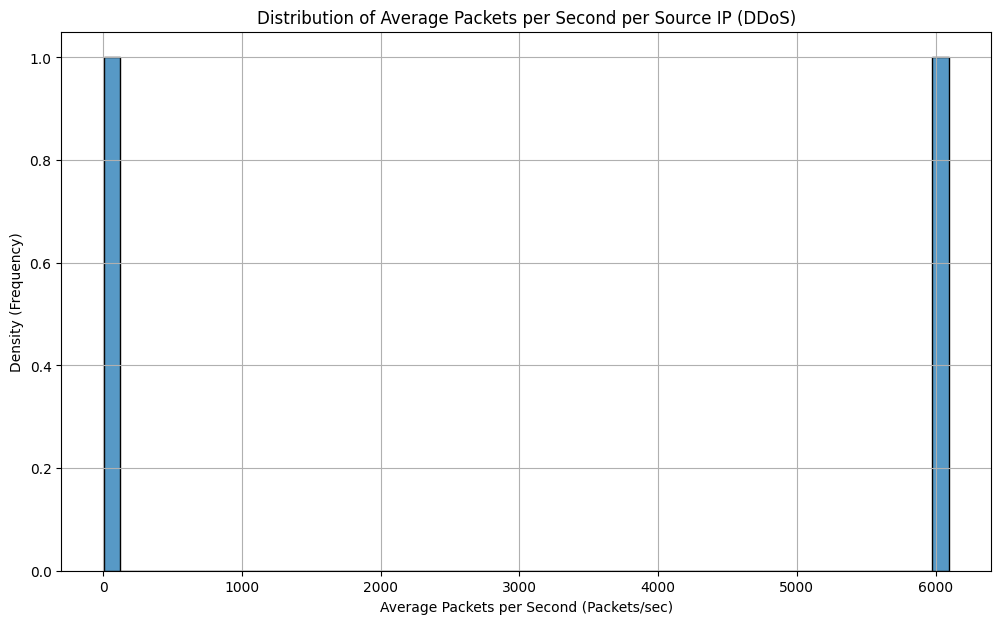

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

df = df[df['Label'] == 'DDoS']
packets_per_second = df.groupby(['Source IP', 'Timestamp']).size().reset_index(name='packet_count')
avg_packets_per_ip = packets_per_second.groupby('Source IP')['packet_count'].mean().reset_index()
avg_packets_per_ip.rename(columns={'packet_count': 'avg_packets_per_second'}, inplace=True)

plt.figure(figsize=(12, 7))
sns.histplot(data=avg_packets_per_ip, x='avg_packets_per_second', bins=50)

plt.title('Distribution of Average Packets per Second per Source IP (DDoS)')
plt.xlabel('Average Packets per Second (Packets/sec)')
plt.ylabel('Density (Frequency)')
plt.grid(True)

output_filename = 'packet_distribution_DDoS.png'
plt.savefig(output_filename)

sorted_ips = avg_packets_per_ip.sort_values(by='avg_packets_per_second', ascending=False)
top_100_ips = sorted_ips.head(100)
print("--- Average Packets per Second 상위 100개 IP ---")
print(top_100_ips.to_string())

뭐지 씨발 192.168.10.n 형식이 RSU IP가 아닌건가
왜 전송 IP가 192.168.10.n인 DDoS가 존재하는거지

생각해보니까 DDoS는 이렇게 하면 안되겠구나
아씨발 모르겟다